In [240]:
import pandas as pd
import seaborn as sns

# Initial Data Exploration and Wrangling

In [241]:
%%bigquery

# We will be using the "trips" table with additional columns for hour and date

SELECT *, EXTRACT(hour FROM `bigquery-public-data.san_francisco.bikeshare_trips`.start_date) as HOUR, 
    EXTRACT(date FROM `bigquery-public-data.san_francisco.bikeshare_trips`.start_date) as DATE
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(date FROM `bigquery-public-data.san_francisco.bikeshare_trips`.start_date) = EXTRACT(date FROM `bigquery-public-data.san_francisco.bikeshare_trips`.end_date)

Downloading: 100%|██████████| 981065/981065 [00:02<00:00, 466218.43rows/s] 


,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,HOUR,DATE
0,944732,2618,2015-09-24 17:22:00+00:00,Mezes,83,2015-09-24 18:06:00+00:00,Mezes,83,653,94063,Customer,17,2015-09-24
1,984595,5957,2015-10-25 18:12:00+00:00,Mezes,83,2015-10-25 19:51:00+00:00,Mezes,83,52,nil,Customer,18,2015-10-25
2,984596,5913,2015-10-25 18:13:00+00:00,Mezes,83,2015-10-25 19:51:00+00:00,Mezes,83,121,nil,Customer,18,2015-10-25
3,1129385,6079,2016-03-18 10:33:00+00:00,Mezes,83,2016-03-18 12:14:00+00:00,Mezes,83,208,94070,Customer,10,2016-03-18
4,1030383,5780,2015-12-06 10:52:00+00:00,Mezes,83,2015-12-06 12:28:00+00:00,Mezes,83,44,94064,Customer,10,2015-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981060,224005,10196,2014-03-22 19:10:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-03-22 22:00:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,355,95655,Customer,19,2014-03-22
981061,1292797,7325,2016-07-27 15:58:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2016-07-27 18:00:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,52,27606,Customer,15,2016-07-27
981062,246039,72,2014-04-12 14:47:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-04-12 14:48:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,309,1,Customer,14,2014-04-12
981063,138370,12752,2013-12-30 13:35:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2013-12-30 17:07:00+00:00,Yerba Buena Center of the Arts (3rd @ Howard),68,439,90068,Customer,13,2013-12-30


In [242]:
%%bigquery df

# Importing the new dataset with some data cleaning

SELECT *
FROM `hanan-w205.Project_1_station_temp.Trips_with_hour`
WHERE start_station_name <> end_station_name
    AND trip_id IS NOT NULL
    AND duration_sec IS NOT NULL
    AND start_date IS NOT NULL
    AND start_station_id IS NOT NULL
    AND end_date IS NOT NULL
    AND end_station_id IS NOT NULL
    AND bike_number IS NOT NULL
    AND duration_sec > 60 AND duration_sec < 5400

Downloading: 100%|██████████| 938916/938916 [00:02<00:00, 343156.06rows/s]


In [243]:
df.head(10)

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type,HOUR,DATE
0,1092841,1021,2016-02-14 05:25:00+00:00,Kaiser Hospital,26,2016-02-14 05:42:00+00:00,Mezes,83,246,94025,Subscriber,5,2016-02-14
1,957659,587,2015-10-05 16:41:00+00:00,Sequoia Hospital,21,2015-10-05 16:51:00+00:00,Mezes,83,650,94063,Subscriber,16,2015-10-05
2,1102613,1334,2016-02-23 12:00:00+00:00,San Mateo County Center,23,2016-02-23 12:22:00+00:00,Mezes,83,174,93292,Customer,12,2016-02-23
3,1047069,1113,2015-12-25 13:17:00+00:00,San Mateo County Center,23,2015-12-25 13:35:00+00:00,Mezes,83,149,94063,Subscriber,13,2015-12-25
4,1114916,1642,2016-03-03 21:54:00+00:00,Redwood City Public Library,24,2016-03-03 22:22:00+00:00,Mezes,83,208,94063,Customer,21,2016-03-03
5,1114919,1377,2016-03-03 22:00:00+00:00,Redwood City Public Library,24,2016-03-03 22:23:00+00:00,Mezes,83,52,94063,Customer,22,2016-03-03
6,984088,422,2015-10-24 14:20:00+00:00,Redwood City Public Library,24,2015-10-24 14:27:00+00:00,Mezes,83,121,94063,Subscriber,14,2015-10-24
7,984411,536,2015-10-25 12:45:00+00:00,Redwood City Public Library,24,2015-10-25 12:54:00+00:00,Mezes,83,138,94063,Subscriber,12,2015-10-25
8,984412,487,2015-10-25 12:45:00+00:00,Redwood City Public Library,24,2015-10-25 12:53:00+00:00,Mezes,83,686,94063,Subscriber,12,2015-10-25
9,984087,451,2015-10-24 14:20:00+00:00,Redwood City Public Library,24,2015-10-24 14:27:00+00:00,Mezes,83,52,94063,Subscriber,14,2015-10-24


#### The following plot was used in order to determine the most popular usage times:

Text(20, 120000, 'Total Trips: \n  938916')

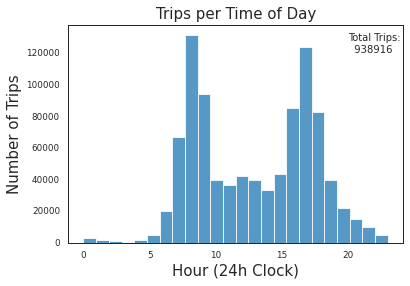

In [257]:
hours = sns.histplot(data = df, x = "HOUR", bins = 24)
hours.set_xlabel("Hour (24h Clock)", fontsize = 15)
hours.set_ylabel("Number of Trips", fontsize = 15)
hours.set_title("Trips per Time of Day", fontsize = 15)
hours.text(20, 120000, f'Total Trips: \n  {len(df)}', fontsize = 10)

# Q1 - What are the 5 most popular trips that you would call "commuter trips"?

For the purpose of this definition, I isolated the trips that are (almost) without doubt commuter trips. I did so by creating a "fingerprint" for the users commuting in the morning and matching them with the trip back from work in the afternoon. This seems to have worked successfully in the most part.

I used the following assumptions to "fingerprint" the users:
1. Users who commute to work in the morning (using the service) will typically also use the service in the afternoon, on their way back from work. Even if that is not the case, I focused on the cases where this is true.
2. The start station in the morning will be the end station in the afternoon, and the start station in the afternoon will be the end station in the morning
3. The zipcode will be the same zipcode of the user (if a zipcode exists for that user)
4. The subscriber type will be the same for morning and afternoon for the same user
5. The trip duration to work will be within the 20% variance range from the trip duration from work
6. Commuter trips will be longer than 90 seconds and shorter than 3600 seconds (1 hour)
7. The start and end station will not be identical for commuters (for neither morning or afternoon trips)
8. Commuters will make their morning trip after 5AM and before 10AM, and their afternoon trip after 3PM and before 9PM

##### Temporary table "hanan-w205.Project_1_station_temp.trip_joined", which will be used to present the commute roundtrips:

```sql

SELECT *
FROM (
    SELECT *, COUNT(*) over (partition by morning_trip_id) as Morning_ID_Count
    FROM (
        SELECT T1.trip_id as morning_trip_id, T1.duration_sec as morning_duration_sec, T1.start_date as morning_start_date, T1.start_station_name as morning_start_name,
            T1.start_station_id as morning_start_id, T1.end_date as morning_end_date, T1.end_station_name as morning_end_name, T1.end_station_id as morning_end_id,
            T1.bike_number as morning_bike_number, T1.zip_code as morning_zip_code, T1.subscriber_type as morning_subscriber_type, T1.HOUR as morning_hour, T1.DATE as morning_date,
            T2.trip_id as afternoon_trip_id, T2.duration_sec as afternoon_duration_sec, T2.start_date as afternoon_start_date, T2.start_station_name as afternoon_start_name,
            T2.start_station_id as afternoon_start_id, T2.end_date as afternoon_end_date, T2.end_station_name as afternoon_end_name, T2.end_station_id as afternoon_end_id,
            T2.bike_number as afternoon_bike_number, T2.zip_code as afternoon_zip_code, T2.subscriber_type as afternoon_subscriber_type, T2.HOUR as afternoon_hour, T2.DATE as afternoon_date,
        FROM `hanan-w205.Project_1_station_temp.Trips_with_hour` T1
        INNER JOIN `hanan-w205.Project_1_station_temp.Trips_with_hour` T2 ON 
            T1.DATE = T2.DATE
            AND T1.start_station_id = T2.end_station_id
            AND T1.end_station_id = T2.start_station_id
            AND T1.zip_code = T2.zip_code
            AND T1.subscriber_type = T2.subscriber_type
            AND ABS((T1.duration_sec - T2.duration_sec)/T1.duration_sec) < 0.2
        WHERE T1.duration_sec > 90 AND T1.duration_sec < 3600 AND T2.duration_sec > 90 AND T2.duration_sec < 3600
            AND T1.start_station_id <> T1.end_station_id
            AND T2.start_station_id <> T2.end_station_id
            AND T1.HOUR < 10 AND T1.HOUR > 4 AND T2.HOUR > 14 AND T2.HOUR < 21
      )
    )
WHERE Morning_ID_Count = 1
ORDER BY morning_trip_id
```

### Sanity Check #1- let's look at the plots of the number of trips by hour, for both the Subscribers and Customers (single-time users):

Text(20, 118000, 'Total Trips: \n  835113')

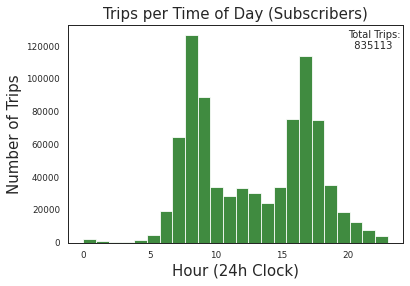

In [245]:
# Trips by hour- Subscribers

hours = sns.histplot(data = df[df.subscriber_type == "Subscriber"], x = "HOUR", bins = 24, color = "darkgreen")
hours.set_xlabel("Hour (24h Clock)", fontsize = 15)
hours.set_ylabel("Number of Trips", fontsize = 15)
hours.set_title("Trips per Time of Day (Subscribers)", fontsize = 15)
hours.text(20, 118000, f'Total Trips: \n  {len(df[df.subscriber_type == "Subscriber"])}', fontsize = 10)

Text(20, 9200, 'Total Trips: \n  103803')

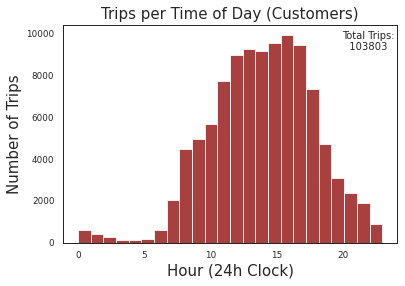

In [246]:
# Trips by hour- Customers

hours = sns.histplot(data = df[df.subscriber_type == "Customer"], x = "HOUR", bins = 24, color = "darkred")
hours.set_xlabel("Hour (24h Clock)", fontsize = 15)
hours.set_ylabel("Number of Trips", fontsize = 15)
hours.set_title("Trips per Time of Day (Customers)", fontsize = 15)
hours.text(20, 9200, f'Total Trips: \n  {len(df[df.subscriber_type == "Customer"])}', fontsize = 10)

#### We can clearly see that Subscribers tend to take the trips mostly in the morning and afternoon hours, when commuters typically travel. On the other hand, the "Customers" travel mostly around mid-day, so we can assume those are typically users that are not commuting.
#### Following that logic, we can run a sanity check: If we managed to successfuly isolate the commuter trips from the non-commuter trips, we should be seeing a significantly higher percentage of subscribers compared to one-time customers.

In [247]:
%%bigquery

# First we will take a look at the original "trips" data set including both commuters and non-commuters. We can see that 86% of the users trips are by subsribers.

SELECT subscriber_type, count(*) as Count
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY subscriber_type

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.39rows/s]


,subscriber_type,Count
0,Customer,136809
1,Subscriber,846839


In [248]:
%%bigquery

# On the other hand, with our new dataset for commuters only- 98.6% of the trips are done by subscribers, implying we successfuly isolated the commuters

SELECT morning_subscriber_type, count(*) as Count
FROM `hanan-w205.Project_1_station_temp.trip_joined`
GROUP BY morning_subscriber_type

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.73rows/s]


,morning_subscriber_type,Count
0,Customer,874
1,Subscriber,60631


### Sanity Check #2- let's look at the usage by day, for both the commuter trips table and the general trips table

In [249]:
%%bigquery days_general

# Percentage of trips by day- General Trips

SELECT weekday_name, ROUND(Count / SUM(Count) over(),2) percentage_of_week
FROM (
    SELECT weekday_name, count(*) as Count
    FROM ( 
        SELECT FORMAT_DATE('%A', start_date) AS weekday_name
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    )
    GROUP BY weekday_name
)
ORDER BY 
     CASE
          WHEN weekday_name = 'Monday' THEN 1
          WHEN weekday_name = 'Tuesday' THEN 2
          WHEN weekday_name = 'Wednesday' THEN 3
          WHEN weekday_name = 'Thursday' THEN 4
          WHEN weekday_name = 'Friday' THEN 5
          WHEN weekday_name = 'Saturday' THEN 6
          WHEN weekday_name = 'Sunday' THEN 7
     END ASC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  6.24rows/s]


In [250]:
days_general

,weekday_name,percentage_of_week
0,Monday,0.17
1,Tuesday,0.19
2,Wednesday,0.18
3,Thursday,0.18
4,Friday,0.16
5,Saturday,0.06
6,Sunday,0.05


Text(0.5, 1.0, 'Trips by day (General Population)')

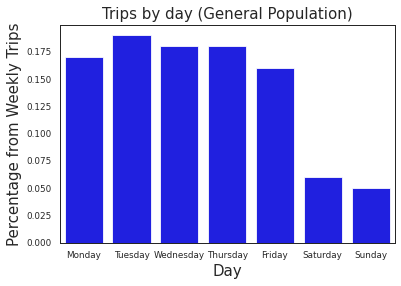

In [251]:
# Trips by day- General

days = sns.barplot(data = days_general, x = "weekday_name", y = "percentage_of_week", color = "blue")
days.set_xlabel("Day", fontsize = 15)
days.set_ylabel("Percentage from Weekly Trips", fontsize = 15)
days.set_title("Trips by day (General Population)", fontsize = 15)

In [252]:
%%bigquery days_commuters

# Percentage of trips by day- Commuter trips

SELECT weekday_name, ROUND(Count / SUM(Count) over(),2) percentage_of_week
FROM (
    SELECT weekday_name, count(*) as Count
    FROM ( 
        SELECT FORMAT_DATE('%A', morning_start_date) AS weekday_name
        FROM `hanan-w205.Project_1_station_temp.trip_joined`

    )
    GROUP BY weekday_name 
)
ORDER BY 
     CASE
          WHEN weekday_name = 'Monday' THEN 1
          WHEN weekday_name = 'Tuesday' THEN 2
          WHEN weekday_name = 'Wednesday' THEN 3
          WHEN weekday_name = 'Thursday' THEN 4
          WHEN weekday_name = 'Friday' THEN 5
          WHEN weekday_name = 'Saturday' THEN 6
          WHEN weekday_name = 'Sunday' THEN 7
     END ASC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  6.19rows/s]


In [253]:
days_commuters

,weekday_name,percentage_of_week
0,Monday,0.20
1,Tuesday,0.23
2,Wednesday,0.21
3,Thursday,0.20
4,Friday,0.16
5,Saturday,0.00
6,Sunday,0.00


Text(0.5, 1.0, 'Trips by day (Commuters)')

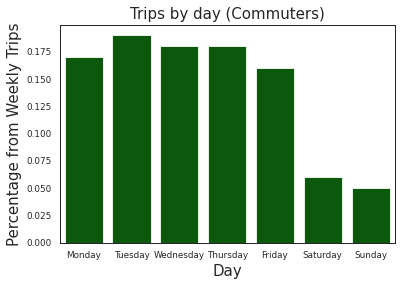

In [254]:
# Trips by day- Commuters

days = sns.barplot(data = days_general, x = "weekday_name", y = "percentage_of_week", color = "darkgreen")
days.set_xlabel("Day", fontsize = 15)
days.set_ylabel("Percentage from Weekly Trips", fontsize = 15)
days.set_title("Trips by day (Commuters)", fontsize = 15)

#### We can clearly see that the general trips population, which includes both commuters and non-commuters, also uses the service on Saturdays and Sundays, when people do not typically commute. On the other hand, with our new commuter table, we can see that 0% of trips are happening on Saturday and Sunday, which also strenghens our belief that the commuter table is reliable

### Finally, we will look at our 5 most popular commuter trips. It is important to note that our dataset only looks at roundtrips- so the order of the stations does not matter in the following table (between station1 and station2)

In [255]:
%%bigquery stations_df

SELECT morning_start_name as station1, morning_end_name as station2, count(*) as trip_freq
FROM hanan-w205.Project_1_station_temp.trip_joined
GROUP BY morning_start_name, morning_end_name
ORDER BY trip_freq DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.81rows/s]


In [256]:
stations_df

,station1,station2,trip_freq
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,1926
1,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,1324
2,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),1240
3,Steuart at Market,Embarcadero at Sansome,1046
4,Mountain View Caltrain Station,Mountain View City Hall,1039


# Q2 - What are your recommendations for offers (justify based on your findings)?

## Offer #1- Longer ride time (per trip) for subscribers on weekends

As we saw earlier, commuters hardly use the service on weekends, when they are not commuting. In fact, it seems like the bikes are generally used much less over the weekends. Encouraging the users to use the bikes for errands and/or leisure over the weekends could increase their value from the subscription and keep them more engaged with the service/reduce churn

## Offer #2- Lower or increase rates on peak commuting times

As we saw earlier, the bikes are mostly used during morning and afternoon commute times. Diffrentiating the price between peak hours and non-peak hours could make a difference in demand, depending on the scenario and our goal:
- Increasing prices during peak hours could lower the demand during those hours, while increasing revenue and allowing less bikes to be bought by the company and therefore saving costs. This will also save labor cost for truck moving bikes around where station are full or empty. On other hand, it might cause the number of users and subscribers to decrease.
- Decreasing prices during peak hours could increase demand for bikes during commute hours, leading to more users and subscribers. On the other hand, it could lead to lower revenue and higher costs of purchasing more bikes and moving bikes around between stations.

In order to determine which of the two is the right one, we will need more data which we do not have access to (such as labor and equipment costs). Another option will be using a model similar to Uber and Lyft's ride-share services, where the cost of the ride is dynamic according to demand.

## Offer #3- Free first ride

Looking at the data, we can see the number of rides done by subscribers is much higher than the number of single-time users, implying there is room for improvement in terms of non-subscribers trying the service for the first time. In addition, we saw that non-subscribers are typically not users who try and use the service for commuting.
By allowing a first free ride for non-subscribers, we could increase the number of people trying the service and potentially becoming subscribers later on.

## Offer #4- Cooperation with the Ferry and Caltrain

The data tells us that the most popular commuter rides are from and to the ferry and Caltrain. By providing the users with special offers/discounts for those using the Caltrain and/or Ferry, we could increase the number of users. This could also work the other way around- The Caltrain and Ferry could also offer special rates for our service's subscribers/users, which will increase demand for both sides.